<a href="https://colab.research.google.com/github/VijayPnr/DL_Project-Eye_Disease_Prediction/blob/main/Eyedisease_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

data = np.load('data.npy')
target = np.load('target.npy')

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

In [ ]:
model = Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))                 #200 - filter/kernal, (3,3) - matrix size,  input shape -> 1 to end [1:]
model.add(Activation('relu'))                                          #apply actvn fn on convolution layer
model.add(MaxPooling2D(pool_size=(2,2)))                             #pooling layer - MaxPooling , pooling size - 2 by 2
#the first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#the second CNN layer followed by Relu and MaxPooling layers

model.add(Flatten())                                                          #flatten --> 2d to 1D
model.add(Dropout(0.5))                                                       #take best 50% 
#flatten layer to stack the output convolution from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 50 neurons
model.add(Dense(5,activation='softmax'))
#the final layer with 5 outputs for the 5 categories

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
#training the CNN

from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [ ]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history = model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
10/10 [==============================] - ETA: 0s - loss: 1.5797 - accuracy: 0.3581

INFO:tensorflow:Assets written to: model-001.model\assets


INFO:tensorflow:Assets written to: model-001.model\assets


10/10 [==============================] - 15s 1s/step - loss: 1.5797 - accuracy: 0.3581 - val_loss: 1.5491 - val_accuracy: 0.3867
Epoch 2/20
10/10 [==============================] - ETA: 0s - loss: 1.4929 - accuracy: 0.4223

INFO:tensorflow:Assets written to: model-002.model\assets


INFO:tensorflow:Assets written to: model-002.model\assets


10/10 [==============================] - 13s 1s/step - loss: 1.4929 - accuracy: 0.4223 - val_loss: 1.4633 - val_accuracy: 0.3867
Epoch 3/20
10/10 [==============================] - 12s 1s/step - loss: 1.4436 - accuracy: 0.4223 - val_loss: 1.5751 - val_accuracy: 0.3867
Epoch 4/20
10/10 [==============================] - ETA: 0s - loss: 1.4109 - accuracy: 0.4223

INFO:tensorflow:Assets written to: model-004.model\assets


INFO:tensorflow:Assets written to: model-004.model\assets


10/10 [==============================] - 14s 1s/step - loss: 1.4109 - accuracy: 0.4223 - val_loss: 1.4341 - val_accuracy: 0.3867
Epoch 5/20
10/10 [==============================] - 12s 1s/step - loss: 1.3472 - accuracy: 0.4223 - val_loss: 1.4741 - val_accuracy: 0.3867
Epoch 6/20
10/10 [==============================] - 12s 1s/step - loss: 1.2314 - accuracy: 0.4459 - val_loss: 1.8070 - val_accuracy: 0.3867
Epoch 7/20
10/10 [==============================] - 12s 1s/step - loss: 1.2050 - accuracy: 0.5270 - val_loss: 1.6497 - val_accuracy: 0.3867
Epoch 8/20
10/10 [==============================] - 12s 1s/step - loss: 1.0607 - accuracy: 0.5270 - val_loss: 1.6547 - val_accuracy: 0.3467
Epoch 9/20
10/10 [==============================] - 12s 1s/step - loss: 0.9819 - accuracy: 0.6182 - val_loss: 1.7994 - val_accuracy: 0.4000
Epoch 10/20
10/10 [==============================] - 12s 1s/step - loss: 0.8579 - accuracy: 0.6757 - val_loss: 1.8088 - val_accuracy: 0.3867
Epoch 11/20
10/10 [===========

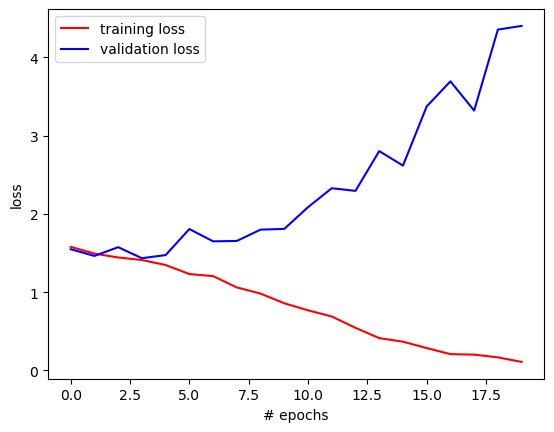

In [ ]:
#plot by training loss & validation loss

from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],'b',label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

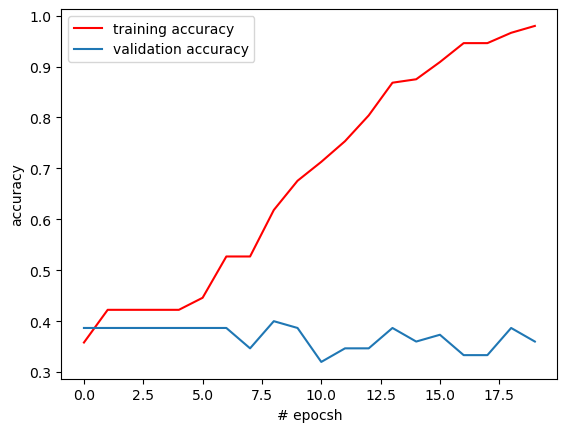

In [ ]:
#plot by accuracy 

from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epocsh')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
model.save('eyediseasemodel.h5')